<a href="https://colab.research.google.com/github/e19166/e19-4yp-Dynamic-Multi-Dimensional-Resource-Orchestration-in-Kubernetes/blob/main/results/service1_memory_limit_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('service1_memory_limit_reduction.csv')
df.head()  # to preview the data

,Timestamp,Service,CPU Request,Memory Request,CPU Limit,Memory Limit,Latency,CPU Usage,Memory Usage
0,2025-05-12T20:50:37.516000,service-1-deployment,0.1,134217728,0.3,268435456,0.004709,0.129629,155594752
1,2025-05-12T20:51:07.586000,service-1-deployment,0.1,134217728,0.3,268435456,0.004655,0.134045,155095040
2,2025-05-12T20:51:37.650000,service-1-deployment,0.1,134217728,0.3,268435456,0.004578,0.135564,155095040
3,2025-05-12T20:52:07.737000,service-1-deployment,0.1,134217728,0.3,268435456,0.004552,0.137067,155213824
4,2025-05-12T20:52:37.809000,service-1-deployment,0.1,134217728,0.3,268435456,0.004480,0.135705,155213824


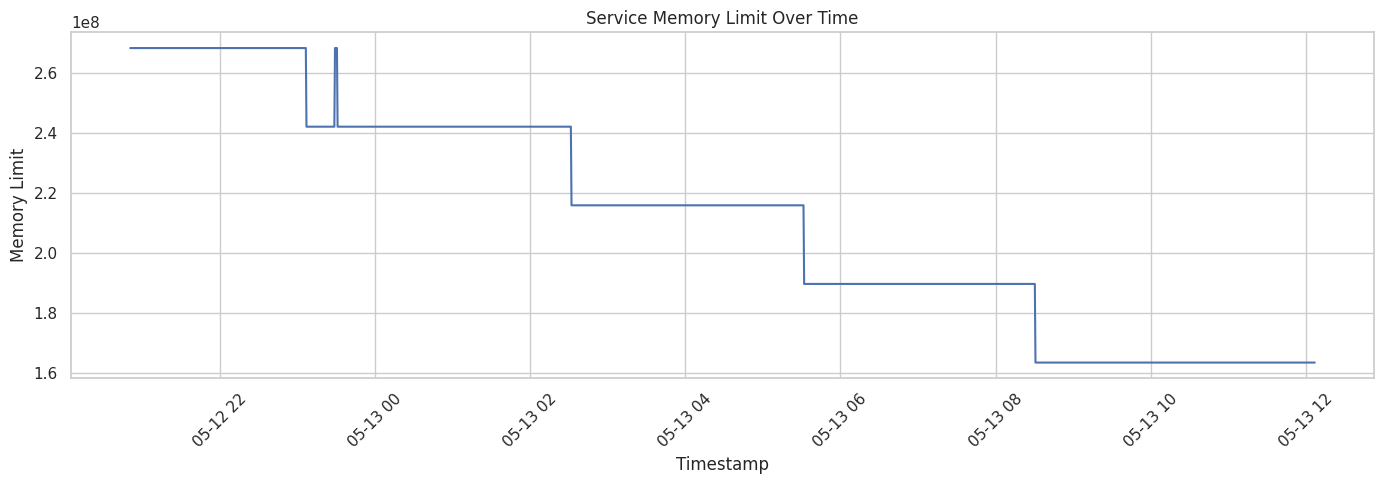

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed')


# Set visual style
sns.set(style="whitegrid")

# Plotting functions
def plot_time_series(x, y, ylabel, title):
  plt.figure(figsize=(14, 5))
  sns.lineplot(x=x, y=y)
  plt.ylabel(ylabel)
  plt.xlabel("Timestamp")
  plt.title(title)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

# 1. Latency over time
plot_time_series(df['Timestamp'], df['Memory Limit'], 'Memory Limit', 'Service Memory Limit Over Time')


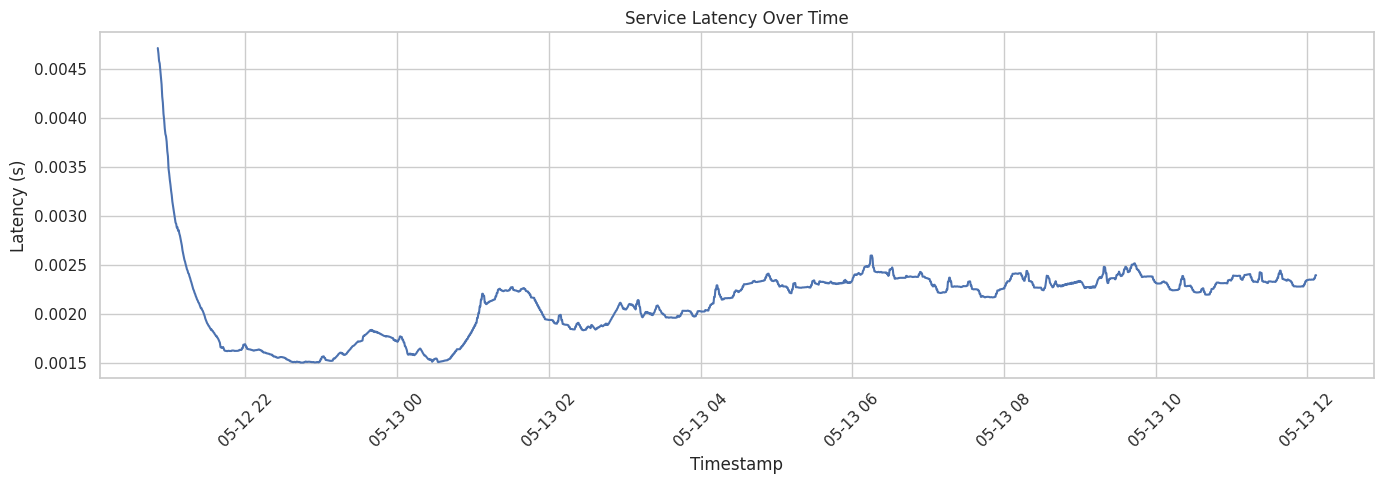

In [3]:
# 1. Latency over time
plot_time_series(df['Timestamp'], df['Latency'], 'Latency (s)', 'Service Latency Over Time')


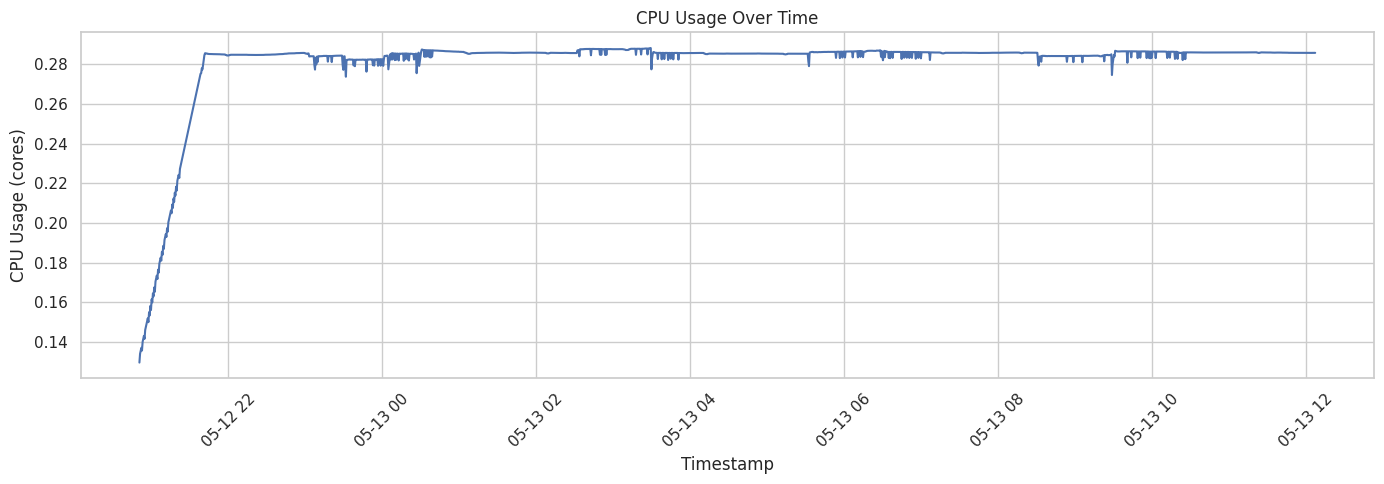

In [4]:
# 2. CPU Usage over time
plot_time_series(df['Timestamp'], df['CPU Usage'], 'CPU Usage (cores)', 'CPU Usage Over Time')
